## import libiraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

## files path

In [2]:
trainpath = ''
testpath = ''

## Open folders

In [3]:
for folder in  os.listdir(trainpath + 'train') : 
    for i in ['/*.png' , '/*.jpg']:
        files = gb.glob(pathname= str( trainpath +'train//' + folder + i))
        print(f'For training data {i[3:]} , found {len(files)} in folder {folder}')

For training data png , found 416 in folder animal_roads
For training data jpg , found 18 in folder animal_roads
For training data png , found 377 in folder empty_roads
For training data jpg , found 109 in folder empty_roads


In [4]:
for folder in  os.listdir(testpath +'test') : 
    for i in ['/*.png' , '/*.jpg']:
        files = gb.glob(pathname= str( testpath +'test//' + folder + i))
        print(f'For testing data {i[3:]}, found {len(files)} in folder {folder}')

For testing data png, found 122 in folder animal_roads
For testing data jpg, found 0 in folder animal_roads
For testing data png, found 118 in folder empty_roads
For testing data jpg, found 0 in folder empty_roads


## show size images for train and test

In [5]:
size = []
for folder in  os.listdir(trainpath +'train') : 
    for i in ['/*.png','/*.jpg']:
        files = gb.glob(pathname= str( trainpath +'train//' + folder + i))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)
pd.Series(size).value_counts()

(720, 1280, 3)     698
(368, 640, 3)       37
(720, 720, 3)       28
(1280, 720, 3)      19
(720, 416, 3)       11
                  ... 
(448, 800, 3)        1
(404, 640, 3)        1
(461, 799, 3)        1
(495, 800, 3)        1
(3130, 2075, 3)      1
Name: count, Length: 98, dtype: int64

In [6]:
size2 = []
for folder in  os.listdir(testpath +'test') : 
    for i in ['/*.png','/*.jpg']:
        files = gb.glob(pathname= str( testpath +'test//' + folder + i))
        for file in files: 
            image = plt.imread(file)
            size2.append(image.shape)
pd.Series(size2).value_counts()

(720, 1280, 3)    222
(368, 640, 3)      18
Name: count, dtype: int64

## load data

### train data

In [7]:
train_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255 , zoom_range=0.2
).flow_from_directory(
    directory='train',target_size=(224,224),class_mode='binary')

Found 978 images belonging to 2 classes.


#### show images with classes

In [8]:
images, labels = train_data.next()

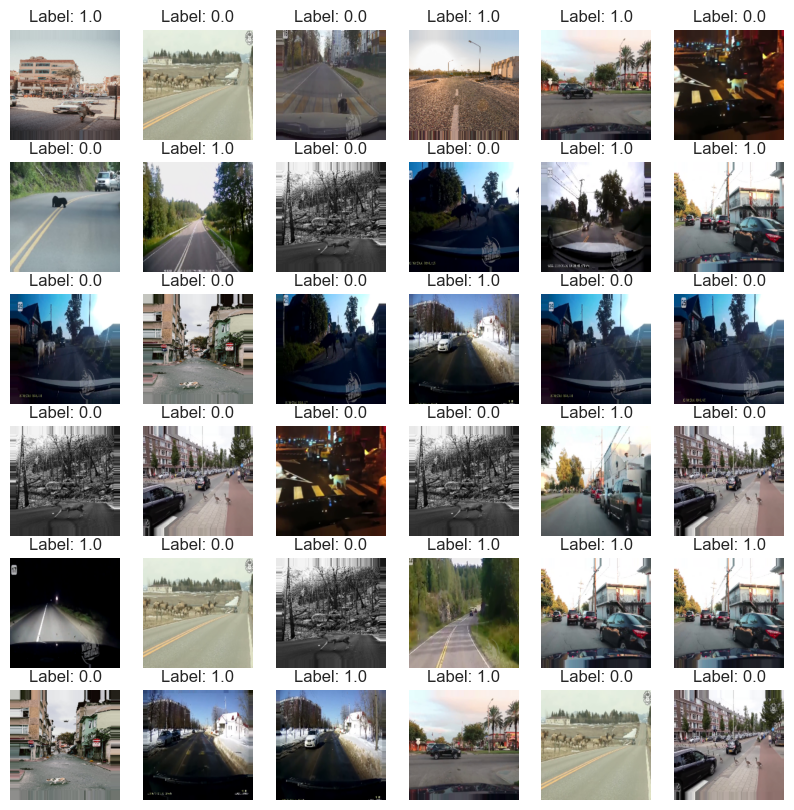

In [9]:
plt.figure(figsize=(10, 10))
for n , i in enumerate(list(np.random.randint(0,len(images),36))) :
    plt.subplot(6,6, n +1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")

plt.show()

### test data

In [10]:
test = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255 , zoom_range=0.2
).flow_from_directory(
    directory='test',target_size=(224,224),class_mode='binary')

Found 240 images belonging to 2 classes.


In [11]:
images1, labels1 = train_data.next()

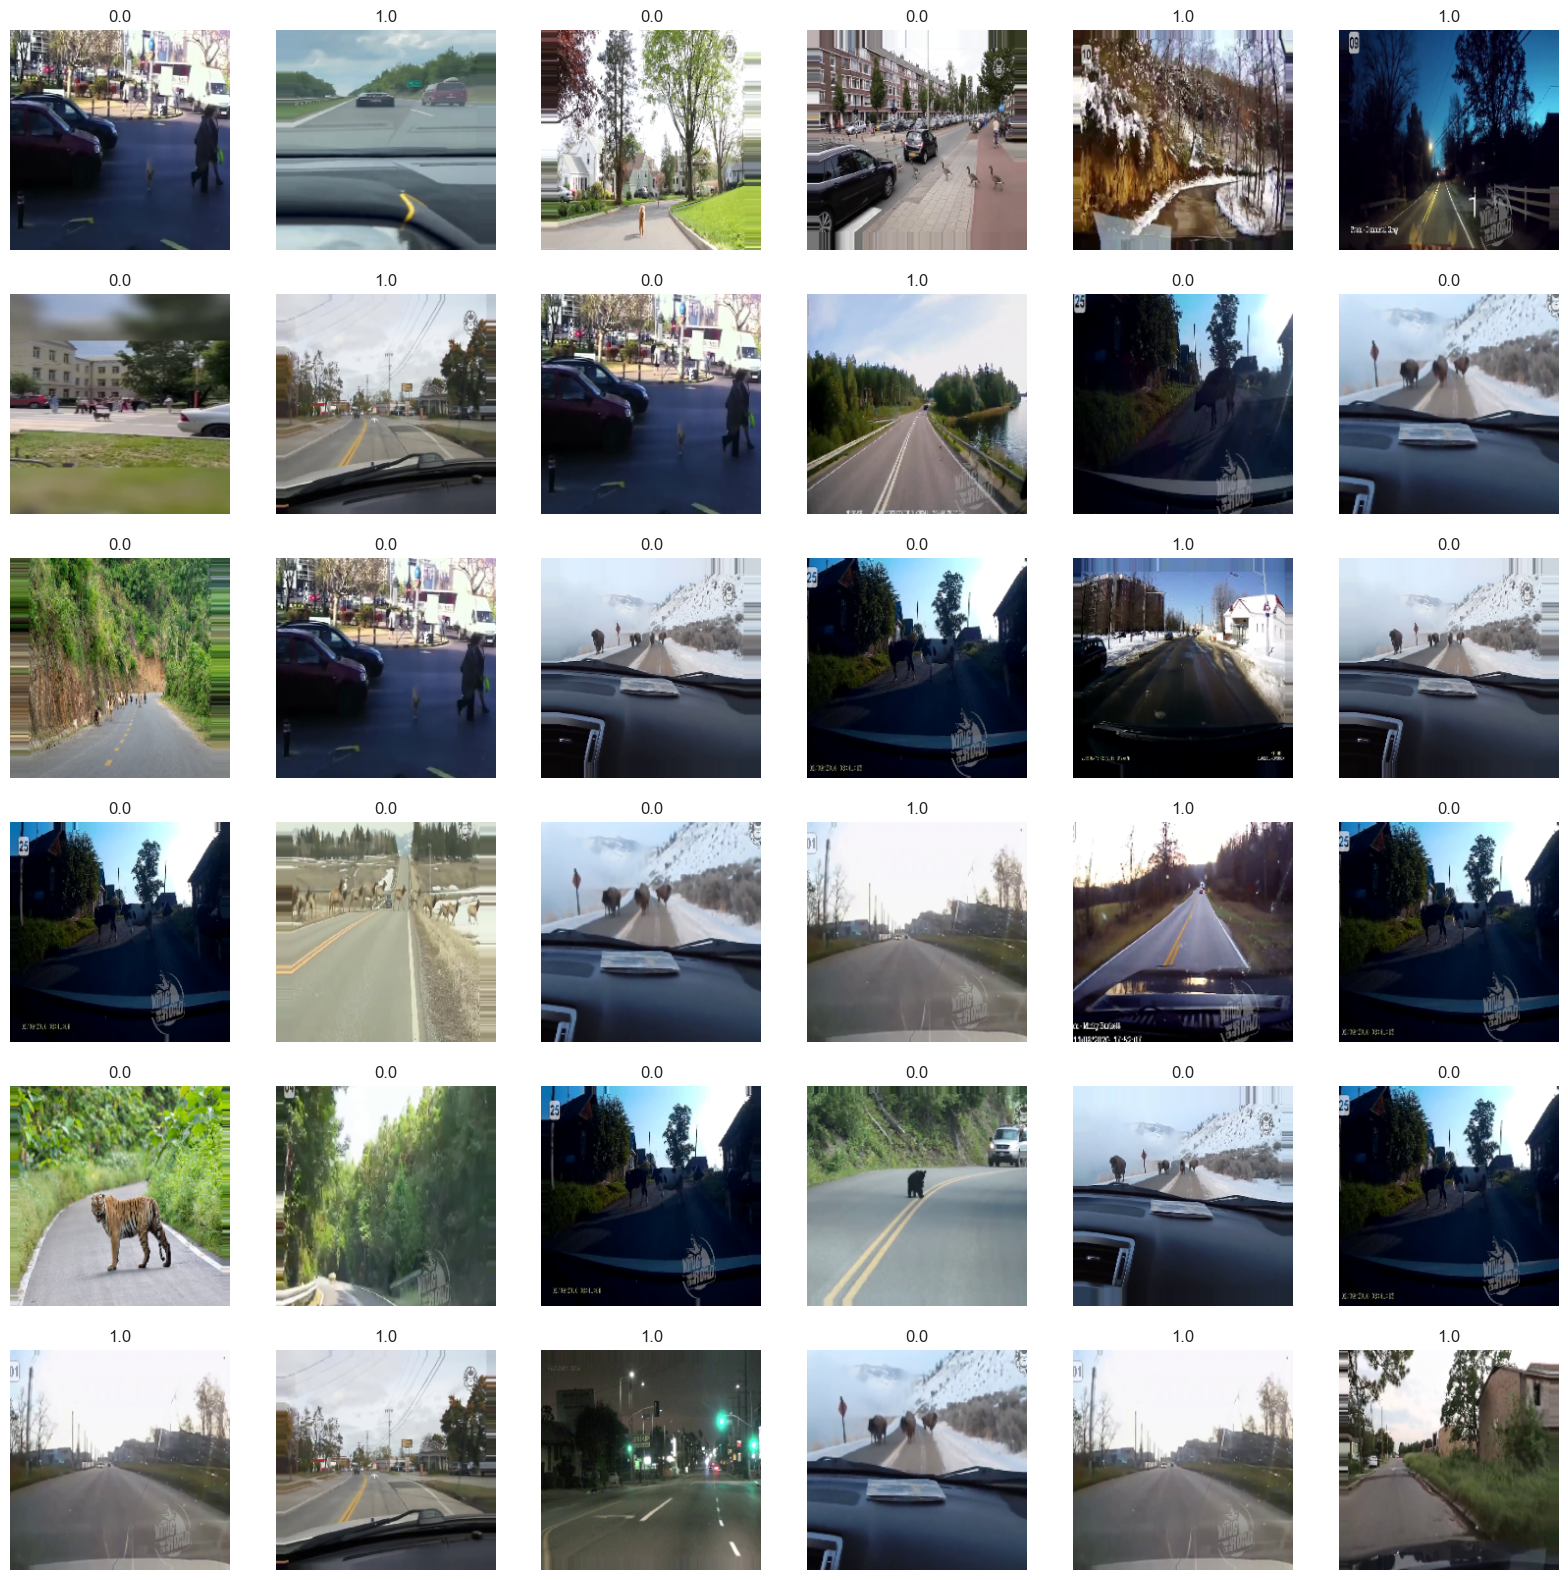

In [12]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(images1),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(images1[i])    
    plt.axis('off')
    plt.title(labels1[i])

## build model

In [13]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(1,activation='sigmoid') ,    
        ])

## train model

In [14]:
KerasModel.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'],run_eagerly=True)

In [15]:
batch_size= 32
ThisModel = KerasModel.fit(
    train_data,
    epochs=20,
    verbose=1,
)

Epoch 1/20
31/31 [==============================] - 1107s 35s/step - loss: 0.6910 - accuracy: 0.5317
Epoch 2/20
31/31 [==============================] - 1092s 35s/step - loss: 0.6773 - accuracy: 0.5859
Epoch 3/20
31/31 [==============================] - 1082s 35s/step - loss: 0.6248 - accuracy: 0.6667
Epoch 4/20
31/31 [==============================] - 1057s 34s/step - loss: 0.5800 - accuracy: 0.6759
Epoch 5/20
31/31 [==============================] - 1055s 34s/step - loss: 0.5526 - accuracy: 0.7321
Epoch 6/20
31/31 [==============================] - 1063s 34s/step - loss: 0.4997 - accuracy: 0.7628
Epoch 7/20
31/31 [==============================] - 1060s 34s/step - loss: 0.4447 - accuracy: 0.8129
Epoch 8/20
31/31 [==============================] - 1080s 35s/step - loss: 0.4244 - accuracy: 0.8231
Epoch 9/20
31/31 [==============================] - 1060s 34s/step - loss: 0.3786 - accuracy: 0.8436
Epoch 10/20
31/31 [==============================] - 1085s 35s/step - loss: 0.3397 - accura

## evaluate model

In [19]:
KerasModel.evaluate(test)

8/8 [==============================] - 130s 15s/step - loss: 2.6672 - accuracy: 0.4958


[2.6672003269195557, 0.4958333373069763]

In [20]:
KerasModel.save('CNN_model.keras')